In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
embedding_model = "TDE-nb-sbert-base"
data_type = "np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"


experiment="embedding"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
file_name_data = f"{data_type}.csv"


folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents=new_data,embedding_model="flair",transformer_document_embeddings=True,embedding_model_path="NbAiLab/nb-sbert-base")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

flair


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

2


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['politikken', 'prioritering', 'regjeringens', 'politikk',
         'politikere', 'partiene', 'prioriterer', 'aktører', 'høring',
         'engasjement', 'opposisjonen', 'myndighetene', 'velferd',
         'representanter', 'helsevesenet', 'regjeringer',
         'saksordføreren', 'organisasjonene', 'ordninger', 'prioritere',
         'utfordringene', 'representantene', 'engasjementet',
         'helseministeren', 'prioritert', 'regjeringen', 'styrking',
         'barnevernet', 'stortingets', 'begrunnelse', 'organisasjoner',
         'virkemidler', 'valg', 'myndigheter', 'skattelette',
         'sammenhenger', 'utredning', 'partier', 'fremmet', 'stortinget',
         'gjennomslag', 'utfordringer', 'velger', 'standpunkt',
         'bistanden', 'avtaler', 'statsradens', 'statens', 'opposisjon',
         'satsingen'],
        ['ingenting', 'negative', 'manglende', 'umulig', 'unødvendig',
         'stille', 'mal', 'alene', 'mangel', 'dokument', 'slett',
         'problem', 'formal'

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'politikken': 0.62671536, 'prioritering': 0.61766434, 'regjeringens': 0.61195815, 'politikk': 0.61035436, 'politikere': 0.6096994, 'partiene': 0.6077287, 'prioriterer': 0.60485965, 'aktører': 0.6039184, 'høring': 0.60210276, 'engasjement': 0.5985284, 'opposisjonen': 0.5982507, 'myndighetene': 0.5939335, 'velferd': 0.5884137, 'representanter': 0.5873095, 'helsevesenet': 0.58681387, 'regjeringer': 0.584764, 'saksordføreren': 0.5846689, 'organisasjonene': 0.583458, 'ordninger': 0.58250445, 'prioritere': 0.58120996, 'utfordringene': 0.5795985, 'representantene': 0.57637715, 'engasjementet': 0.575958, 'helseministeren': 0.57572687, 'prioritert': 0.575597, 'regjeringen': 0.575366, 'styrking': 0.57449615, 'barnevernet': 0.5742815, 'stortingets': 0.572491, 'begrunnelse': 0.57236594, 'organisasjoner': 0.57225156, 'virkemidler': 0.5721418, 'valg': 0.5718224, 'myndigheter': 0.5713626, 'skattelette': 0.5709672, 'sammenhenger': 0.5707849, 'utredning': 0.5706738, 'partier': 0.5705681, 'fremmet'

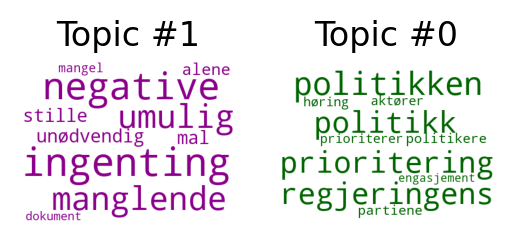

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

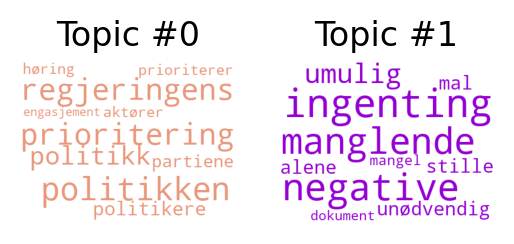

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

2

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('politikken', 'prioritering') wordtuple
('politikken', 'prioritering') wordup
6.0 over
13869.0 under
-11.174613647235942 -2.584962500721156 4.322930659194644 ('politikken', 'prioritering') 6 207 67
('politikken', 'regjeringens') wordtuple
('politikken', 'regjeringens') wordup
32.0 over
67068.0 under
-11.03333696038395 -5.0 2.20666739207679 ('politikken', 'regjeringens') 32 207 324
('politikk', 'politikken') wordtuple
('politikk', 'politikken') wordup
185.0 over
120474.0 under
-9.346980839891296 -7.531381460516312 1.2410712282857224 ('politikk', 'politikken') 185 207 582
('politikere', 'politikken') wordtuple
('politikere', 'politikken') wordup
23.0 over
23805.0 under
-10.015415052386688 -4.523561956057013 2.2140550189604737 ('politikere', 'politikken') 23 207 115
('partiene', 'politikken') wordtuple
('partiene', 'politikken') wordup
42.0 over
44919.0 under
-10.062720767165045 -5.392317422778761 1.8661217391723093 ('partiene', 'politikken') 42 207 217
('politikken', 'prioriterer') w

In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.3074492856534207


In [24]:
diversity

1.0

In [25]:
coherence

2.913334287960656

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                       │ Metric    │   Value │
╞═════════════════════════════════════════════╪═══════════╪═════════╡
│ top2vec_TDE-nb-sbert-base_np_mini_stopwords │ coherence │ 2.91333 │
├─────────────────────────────────────────────┼───────────┼─────────┤
│ top2vec_TDE-nb-sbert-base_np_mini_stopwords │ diversity │ 1       │
╘═════════════════════════════════════════════╧═══════════╧═════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})